In [1]:
# Healthcare Cost Drivers Analysis
# Phase 5 – Python Analytics

print("Python environment ready")


Python environment ready


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r"C:\Users\suman\OneDrive\Desktop\Major Project\Cleaned data\healthcare_cleaned.csv.csv")


In [5]:
df.head()


,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_flag,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,1,under_30
1,18,male,33.770,1,no,southeast,1725.55230,obese,0,under_30
2,28,male,33.000,3,no,southeast,4449.46200,obese,0,under_30
3,33,male,22.705,0,no,northwest,21984.47061,normal,0,30_to_44
4,32,male,28.880,0,no,northwest,3866.85520,overweight,0,30_to_44


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   bmi_category  1338 non-null   object 
 8   smoker_flag   1338 non-null   int64  
 9   age_group     1338 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 104.7+ KB


In [7]:
df.describe()


,age,bmi,children,charges,smoker_flag
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


In [8]:
avg_cost_by_smoker = df.groupby("smoker")["charges"].mean()
avg_cost_by_smoker


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [9]:
avg_cost_by_bmi = (
    df.groupby("bmi_category")["charges"]
      .mean()
      .sort_values(ascending=False)
)

avg_cost_by_bmi


bmi_category
obese          15552.335469
overweight     10987.509891
normal         10409.337709
underweight     8852.200585
Name: charges, dtype: float64

In [10]:
avg_cost_by_age = (
    df.groupby("age_group")["charges"]
      .mean()
)

avg_cost_by_age


age_group
30_to_44    12490.912530
45_to_59    15922.929285
60_plus     21248.021885
under_30     9182.487125
Name: charges, dtype: float64

In [11]:
avg_cost_smoker_df = (
    df.groupby("smoker")["charges"]
      .mean()
      .reset_index()
)

avg_cost_smoker_df


,smoker,charges
0,no,8434.268298
1,yes,32050.231832


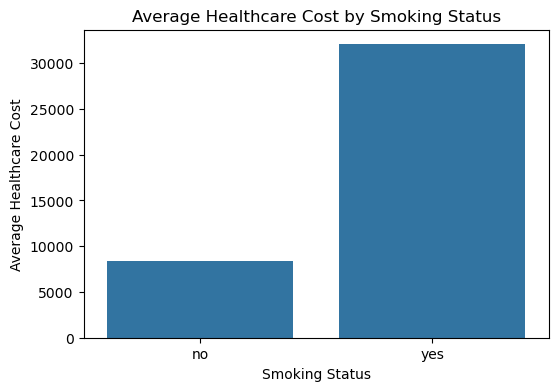

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=avg_cost_smoker_df,
    x="smoker",
    y="charges"
)

plt.title("Average Healthcare Cost by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Average Healthcare Cost")
plt.show()
